<a href="https://colab.research.google.com/github/gtoubian/cce/blob/main/4_2_Hypothesis_Testing_Workshop_Gabriel_Toubian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gabriel Toubian** - gtoubian@gmail.com

#NOTE:
Please insert a text cell at the top of the Notebook with your Full Name in Bold and your email that you use for both Journey and Github

Also, add to the title of the notebook, an underscore as well as your name.

Ex. 'Workshop_Hypothesis_Testing_Usama'

#Warmup

Import pandas, numpy, scipy.stats, statsmodels.api & statsmodels.formula.api.ols 

In [5]:
import pandas as pd
import numpy as np
import scipy.stats as sc
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Hypothesis Testing

##Iris Data
It is believed that the average sepal length of the setosa species is 4 cm. Use the Iris data set as well as the appropriate test to determine if we have evidence to reject this claim.

In [6]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


setosa             AxesSubplot(0.1,0.559091;0.363636x0.340909)
versicolor    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
virginica              AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

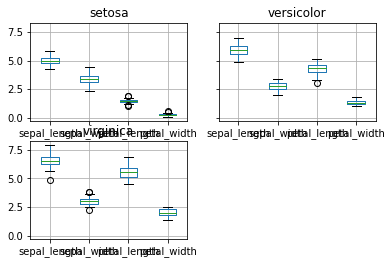

In [12]:
df1 = df.groupby('species')
df1.boxplot()

In [26]:
df['sepal_width'] = np.sqrt(np.abs(df['sepal_width'])) * (df['sepal_width'] >= 0)

In [27]:
df['sepal_length'] = np.sqrt(np.abs(df['sepal_length'])) * (df['sepal_length'] >= 0)

setosa             AxesSubplot(0.1,0.559091;0.363636x0.340909)
versicolor    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
virginica              AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

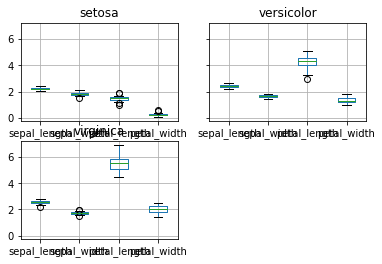

In [29]:
df1 = df.groupby('species')
df1.boxplot()

In [28]:
#T-Test

score = np.array(df['sepal_length'])
sc.ttest_1samp(score, 4.0)

Ttest_1sampResult(statistic=-114.11150163158062, pvalue=6.44502447516953e-147)

p-value is less than 0.05 so we can reject the null hypothesis



Use an appropriate test to see if there is a significant difference in the average sepal width between the versicolor and virginica species.

In [ ]:
versi = np.array(df[df["species"]=="versicolor"]["sepal_width"])
virgin = np.array(df[df["species"]=="virginica"]["sepal_width"])

sc.ttest_ind(versi, virgin, equal_var=False)

Ttest_indResult(statistic=-3.2057607502218186, pvalue=0.001819483482104968)

In [ ]:
#p-value is less than 0.05 so there is significant difference

##Robberies in Toronto

Download the Robberies in Toronto Data Set from this link (https://data.torontopolice.on.ca/datasets/robbery-2014-to-2019?geometry=-79.896%2C43.627%2C-78.853%2C43.800) and read it into a DataFrame. Use an appropriate test to see if whether the Robbery occured on a weekend affected whether the Robbery would occur in the Day or in the Night. 

**HINT:** You may assume that day hours are from 6 am to 6 pm. Before carrying out your analysis, you must modify your data frame such that each row has a column saying whether the crime occured over the weekend or not as well as a column saying whether the crime occured during the day or night.

In [ ]:
from google.colab import files
data = files.upload()

Saving Robbery.csv to Robbery (2).csv


In [ ]:
import io
robbery = pd.read_csv(io.BytesIO(data['Robbery.csv']))

In [ ]:
robbery.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,reporteddayofweek,reportedhour,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Long,Lat,ObjectId
0,-8822362.649,5423352.254,2150,GO-20141468111,2014/02/04 05:00:00+00,2014/02/04 05:00:00+00,Apartment,1610,200,Robbery - Mugging,2014,February,4,35,Tuesday,13,2014.0,February,4.0,35.0,Tuesday,13,Robbery,D41,124,Kennedy Park (124),-79.252632,43.727394,1
1,-8833352.599,5413356.045,2158,GO-20141474998,2014/02/05 05:00:00+00,2014/02/05 05:00:00+00,Apartment,1610,130,Robbery - Home Invasion,2014,February,5,36,Wednesday,16,2014.0,February,5.0,36.0,Wednesday,16,Robbery,D55,70,South Riverdale (70),-79.351356,43.662468,2
2,-8833352.599,5413356.045,2159,GO-20141474998,2014/02/05 05:00:00+00,2014/02/05 05:00:00+00,Apartment,1610,130,Robbery - Home Invasion,2014,February,5,36,Wednesday,16,2014.0,February,5.0,36.0,Wednesday,16,Robbery,D55,70,South Riverdale (70),-79.351356,43.662468,3
3,-8832786.117,5415849.969,2165,GO-20142951465,2014/09/21 04:00:00+00,2014/09/21 04:00:00+00,Outside,1610,150,Robbery - Purse Snatch,2014,September,21,264,Sunday,3,2014.0,September,21.0,264.0,Sunday,2,Robbery,D55,68,North Riverdale (68),-79.346268,43.678673,4
4,-8834139.049,5415810.627,2173,GO-20143017218,2014/09/30 04:00:00+00,2014/09/30 04:00:00+00,Commercial,1610,210,Robbery - Business,2014,September,30,273,Tuesday,20,2014.0,September,30.0,273.0,Tuesday,20,Robbery,D54,67,Playter Estates-Danforth (67),-79.358421,43.678417,5


In [ ]:
robbery['occurrencedayofweek'] = robbery['occurrencedayofweek'].str.replace(" ","")

In [ ]:
robbery.loc[(robbery['occurrencedayofweek'] == 'Sunday'), 'weekdayorend'] = 'Weekend'

In [ ]:
robbery.loc[(robbery['occurrencedayofweek'] == 'Saturday'), 'weekdayorend'] = 'Weekend'

In [ ]:
robbery.loc[(robbery['occurrencedayofweek'] == 'Monday'), 'weekdayorend'] = 'Weekday'

In [ ]:
robbery.loc[(robbery['occurrencedayofweek'] == 'Tuesday'), 'weekdayorend'] = 'Weekday'

In [ ]:
robbery.loc[(robbery['occurrencedayofweek'] == 'Wednesday'), 'weekdayorend'] = 'Weekday'

In [ ]:
robbery.loc[(robbery['occurrencedayofweek'] == 'Thursday'), 'weekdayorend'] = 'Weekday'

In [ ]:
robbery.loc[(robbery['occurrencedayofweek'] == 'Friday'), 'weekdayorend'] = 'Weekday'

In [ ]:
robbery.head(50)

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,reporteddayofweek,reportedhour,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Long,Lat,ObjectId,weekdayorend
0,-8822362.649,5423352.254,2150,GO-20141468111,2014/02/04 05:00:00+00,2014/02/04 05:00:00+00,Apartment,1610,200,Robbery - Mugging,2014,February,4,35,Tuesday,13,2014.0,February,4.0,35.0,Tuesday,13,Robbery,D41,124,Kennedy Park (124),-79.252632,43.727394,1,Weekday
1,-8833352.599,5413356.045,2158,GO-20141474998,2014/02/05 05:00:00+00,2014/02/05 05:00:00+00,Apartment,1610,130,Robbery - Home Invasion,2014,February,5,36,Wednesday,16,2014.0,February,5.0,36.0,Wednesday,16,Robbery,D55,70,South Riverdale (70),-79.351356,43.662468,2,Weekday
2,-8833352.599,5413356.045,2159,GO-20141474998,2014/02/05 05:00:00+00,2014/02/05 05:00:00+00,Apartment,1610,130,Robbery - Home Invasion,2014,February,5,36,Wednesday,16,2014.0,February,5.0,36.0,Wednesday,16,Robbery,D55,70,South Riverdale (70),-79.351356,43.662468,3,Weekday
3,-8832786.117,5415849.969,2165,GO-20142951465,2014/09/21 04:00:00+00,2014/09/21 04:00:00+00,Outside,1610,150,Robbery - Purse Snatch,2014,September,21,264,Sunday,3,2014.0,September,21.0,264.0,Sunday,2,Robbery,D55,68,North Riverdale (68),-79.346268,43.678673,4,Weekend
4,-8834139.049,5415810.627,2173,GO-20143017218,2014/09/30 04:00:00+00,2014/09/30 04:00:00+00,Commercial,1610,210,Robbery - Business,2014,September,30,273,Tuesday,20,2014.0,September,30.0,273.0,Tuesday,20,Robbery,D54,67,Playter Estates-Danforth (67),-79.358421,43.678417,5,Weekday
5,-8833159.805,5415748.382,2178,GO-20143109556,2014/10/15 04:00:00+00,2014/10/15 04:00:00+00,Commercial,1610,110,Robbery - Financial Institute,2014,October,15,288,Wednesday,17,2014.0,October,15.0,288.0,Wednesday,16,Robbery,D54,67,Playter Estates-Danforth (67),-79.349625,43.678013,6,Weekday
6,-8830369.003,5437043.260,2197,GO-20142472527,2014/07/10 04:00:00+00,2014/07/10 04:00:00+00,Outside,1610,100,Robbery With Weapon,2014,July,10,191,Thursday,22,2014.0,July,10.0,191.0,Thursday,22,Robbery,D42,116,Steeles (116),-79.324554,43.816204,7,Weekday
7,-8836158.685,5412460.894,2201,GO-20142620832,2014/08/02 04:00:00+00,2014/08/02 04:00:00+00,Outside,1610,200,Robbery - Mugging,2014,August,2,214,Saturday,14,2014.0,August,2.0,214.0,Saturday,9,Robbery,D51,75,Church-Yonge Corridor (75),-79.376564,43.656650,8,Weekend
8,-8824339.828,5435652.698,2216,GO-20142642764,2014/08/05 04:00:00+00,2014/08/05 04:00:00+00,Outside,1610,180,Robbery - Swarming,2014,August,5,217,Tuesday,20,2014.0,August,5.0,217.0,Tuesday,19,Robbery,D42,129,Agincourt North (129),-79.270393,43.807190,9,Weekday
9,-8827553.577,5426992.808,2225,GO-20142902664,2014/09/13 04:00:00+00,2014/09/13 04:00:00+00,Outside,1610,200,Robbery - Mugging,2014,September,13,256,Saturday,15,2014.0,September,13.0,256.0,Saturday,14,Robbery,D41,119,Wexford/Maryvale (119),-79.299263,43.751022,10,Weekend


In [ ]:
robbery.loc[(robbery['occurrencehour'] >=6) & (robbery['occurrencehour'] <= 18), 'time'] = 'day'

In [ ]:
robbery.loc[(robbery['occurrencehour'] < 6) | (robbery['occurrencehour'] > 18), 'time'] = 'night'

In [ ]:
robbery

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,reporteddayofweek,reportedhour,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Long,Lat,ObjectId,weekdayorend,time
0,-8822362.649,5423352.254,2150,GO-20141468111,2014/02/04 05:00:00+00,2014/02/04 05:00:00+00,Apartment,1610,200,Robbery - Mugging,2014,February,4,35,Tuesday,13,2014.0,February,4.0,35.0,Tuesday,13,Robbery,D41,124,Kennedy Park (124),-79.252632,43.727394,1,Weekday,day
1,-8833352.599,5413356.045,2158,GO-20141474998,2014/02/05 05:00:00+00,2014/02/05 05:00:00+00,Apartment,1610,130,Robbery - Home Invasion,2014,February,5,36,Wednesday,16,2014.0,February,5.0,36.0,Wednesday,16,Robbery,D55,70,South Riverdale (70),-79.351356,43.662468,2,Weekday,day
2,-8833352.599,5413356.045,2159,GO-20141474998,2014/02/05 05:00:00+00,2014/02/05 05:00:00+00,Apartment,1610,130,Robbery - Home Invasion,2014,February,5,36,Wednesday,16,2014.0,February,5.0,36.0,Wednesday,16,Robbery,D55,70,South Riverdale (70),-79.351356,43.662468,3,Weekday,day
3,-8832786.117,5415849.969,2165,GO-20142951465,2014/09/21 04:00:00+00,2014/09/21 04:00:00+00,Outside,1610,150,Robbery - Purse Snatch,2014,September,21,264,Sunday,3,2014.0,September,21.0,264.0,Sunday,2,Robbery,D55,68,North Riverdale (68),-79.346268,43.678673,4,Weekend,night
4,-8834139.049,5415810.627,2173,GO-20143017218,2014/09/30 04:00:00+00,2014/09/30 04:00:00+00,Commercial,1610,210,Robbery - Business,2014,September,30,273,Tuesday,20,2014.0,September,30.0,273.0,Tuesday,20,Robbery,D54,67,Playter Estates-Danforth (67),-79.358421,43.678417,5,Weekday,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21538,-8853863.204,5402824.728,195443,GO-20191538450,2019/08/13 04:00:00+00,2019/08/13 04:00:00+00,Commercial,1610,210,Robbery - Business,2019,August,13,225,Tuesday,23,2019.0,August,13.0,225.0,Tuesday,23,Robbery,D22,19,Long Branch (19),-79.535606,43.593990,21539,Weekday,night
21539,-8849811.186,5413826.821,195454,GO-20191779746,2019/09/16 04:00:00+00,2019/09/16 04:00:00+00,Apartment,1610,100,Robbery With Weapon,2019,September,16,259,Monday,13,2019.0,September,16.0,259.0,Monday,13,Robbery,D11,114,Lambton Baby Point (114),-79.499206,43.665527,21540,Weekday,day
21540,-8837757.923,5414565.340,195459,GO-20191818597,2019/09/21 04:00:00+00,2019/09/21 04:00:00+00,Other,1610,200,Robbery - Mugging,2019,September,21,264,Saturday,14,2019.0,September,21.0,264.0,Saturday,14,Robbery,D53,95,Annex (95),-79.390930,43.670326,21541,Weekend,day
21541,-8837757.923,5414565.340,195460,GO-20191818597,2019/09/21 04:00:00+00,2019/09/21 04:00:00+00,Other,1610,200,Robbery - Mugging,2019,September,21,264,Saturday,14,2019.0,September,21.0,264.0,Saturday,14,Robbery,D53,95,Annex (95),-79.390930,43.670326,21542,Weekend,day


In [ ]:
#Chi Square Test

ContingencyTable = pd.crosstab(index=robbery['weekdayorend'], columns = robbery['time'])
print(ContingencyTable)

time           day  night
weekdayorend             
Weekday       7349   8012
Weekend       2081   4099


In [ ]:
(chi2, p, dof, _) = sc.chi2_contingency([ContingencyTable.iloc[0].values, ContingencyTable.iloc[1].values])
print(f"The Chi Square value is {chi2} with a p value of {p}")

The Chi Square value is 358.8825655197287 with a p value of 4.930638235925713e-80


In [ ]:
#The p-value is below 0.05 so the crime occurring on weekday or weekend seems to have an effect on if it's day or night.

##Stroke Prediction

Load the following dataset off Kaggle: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

We are interested in creating a model that can predict someone's BMI based on certain features. Use the appropriate test to determine if Hypertension and whether someone has been married or not affects their BMI.

In [ ]:
from google.colab import files
data = files.upload()

Saving healthcare.csv to healthcare (1).csv


In [ ]:
health = pd.read_csv(io.BytesIO(data['healthcare.csv']))

In [ ]:
health.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#Two way ANOVA:

health1 = health[["hypertension", "ever_married", "bmi"]]
model = ols('bmi ~ C(ever_married) + C(hypertension) + C(ever_married):C(hypertension)', data = health1).fit()

In [ ]:
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(ever_married),30745.470969,1.0,576.600007,1.468201e-120
C(hypertension),3922.790936,1.0,73.567950,1.287162e-17
C(ever_married):C(hypertension),1941.001846,1.0,36.401514,1.723698e-09
Residual,261544.455913,4905.0,NaN,NaN


In [ ]:
# According to the two way ANOVA, both being married and having hypertension seem to have an effect on BMI